# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import seaborn as sns

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

city_data = "../output_data/cities_1.csv"

city_data_df= pd.read_csv(city_data)

# Display sample data
city_data_df.head(10)



,City_ID,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,0,laguna,38.4210,-121.4238,11.62,76,0,0.00,US,1675826601
1,1,los llanos de aridane,28.6585,-17.9182,11.86,62,20,3.09,ES,1675826602


### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
#sample url : https://api.openweathermap.org/data/2.5/weather?APPID=0d1de097fcdf1ebc612491937c5c61a4&q=bredasdorp


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key ="weather_api_key"

# Create base endpoint URL
baseURL = url + "appid=" + weather_api_key + "&units=metric" + "&q=" 


#http://api.openweathermap.org/data/2.5/weather?appid=0d1de097fcdf1ebc612491937c5c61a4&units=metric&q=





# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"https://api.openweathermap.org/v1/data/2.5/weather/search?text={city_data}&format=jsons&api_Key={weather_api_key}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
                
    # Run an API request for each of the cities
    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        response = requests.get(baseURL + city).json()
 
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt'] 
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max_Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind_Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
     #if error is experienced, skip the city
    except Exception as ex:
       print(f"No weaather record found for city: {city}")
       pass

    # Add 1 to the record count
    record_count += 1
           
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
No weaather record found for city: grand river south east
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | taurianova
Processing Record 6 of Set 1 | port macquarie
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | padang
Processing Record 9 of Set 1 | vaitupu
No weaather record found for city: vaitupu
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | daru
Processing Record 12 of Set 1 | palabuhanratu
No weaather record found for city: palabuhanratu
Processing Record 13 of Set 1 | palm city
Processing Record 14 of Set 1 | avera
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | san rafael
Processing Record 18 of Set 1 | suntar
Processing Record 19 of Set 1 | ugoofaaru
Pr

Processing Record 30 of Set 4 | saint-augustin
Processing Record 31 of Set 4 | sabzevar
Processing Record 32 of Set 4 | kloulklubed
Processing Record 33 of Set 4 | sawtell
Processing Record 34 of Set 4 | dharmanagar
Processing Record 35 of Set 4 | mamlyutka
Processing Record 36 of Set 4 | roebourne
Processing Record 37 of Set 4 | hilo
Processing Record 38 of Set 4 | noumea
Processing Record 39 of Set 4 | saravan
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | madang
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | stoyba
No weaather record found for city: stoyba
Processing Record 44 of Set 4 | san jose
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | somme-leuze
Processing Record 47 of Set 4 | puerto del rosario
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | farafangana
Processing Record 0 of Set 5 | gatton
Processing Record 1 of Set 5 | mbandaka
Processing Record 2 of Set 5 | aklavik
Pr

Processing Record 18 of Set 8 | ocampo
Processing Record 19 of Set 8 | fairbanks
Processing Record 20 of Set 8 | russell
Processing Record 21 of Set 8 | wicklow
Processing Record 22 of Set 8 | khash
Processing Record 23 of Set 8 | marzuq
Processing Record 24 of Set 8 | tateyama
Processing Record 25 of Set 8 | hamilton
Processing Record 26 of Set 8 | oranjemund
Processing Record 27 of Set 8 | misratah
Processing Record 28 of Set 8 | tokur
Processing Record 29 of Set 8 | amapa
Processing Record 30 of Set 8 | purpe
Processing Record 31 of Set 8 | la sarre
Processing Record 32 of Set 8 | barmer
Processing Record 33 of Set 8 | ust-barguzin
Processing Record 34 of Set 8 | cherskiy
Processing Record 35 of Set 8 | glubokoe
No weaather record found for city: glubokoe
Processing Record 36 of Set 8 | pitea
Processing Record 37 of Set 8 | dudinka
Processing Record 38 of Set 8 | khawhai
Processing Record 39 of Set 8 | tumannyy
No weaather record found for city: tumannyy
Processing Record 40 of Set 

Processing Record 41 of Set 11 | falealupo
No weaather record found for city: falealupo
Processing Record 42 of Set 11 | beypur
No weaather record found for city: beypur
Processing Record 43 of Set 11 | zabid
Processing Record 44 of Set 11 | wanaka
Processing Record 45 of Set 11 | razdolinsk
Processing Record 46 of Set 11 | nenjiang
Processing Record 47 of Set 11 | xinzhi
Processing Record 48 of Set 11 | ballina
Processing Record 49 of Set 11 | tirat karmel
Processing Record 0 of Set 12 | nuuk
Processing Record 1 of Set 12 | williams lake
Processing Record 2 of Set 12 | nuseni
Processing Record 3 of Set 12 | asau
Processing Record 4 of Set 12 | katobu
Processing Record 5 of Set 12 | vytegra
Processing Record 6 of Set 12 | lokoja
Processing Record 7 of Set 12 | college
Processing Record 8 of Set 12 | tyret pervaya
Processing Record 9 of Set 12 | phan thiet
Processing Record 10 of Set 12 | hofn
Processing Record 11 of Set 12 | warqla
No weaather record found for city: warqla
Processing R

In [12]:
## creating dataFrame from city_data list

city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          577
Lat           577
Lng           577
Max_Temp      577
Humidity      577
Cloudiness    577
Wind_Speed    577
Country       577
Date          577
dtype: int64

In [13]:
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,bethel,41.3712,-73.4140,3.20,85,100,0.00,US,1675826537
1,rikitea,-23.1203,-134.9692,26.58,69,37,4.04,PF,1675826711
2,esperance,-33.8667,121.9000,22.01,64,78,5.21,AU,1675826711
3,taurianova,38.3563,16.0109,5.77,71,32,1.65,IT,1675826712
4,port macquarie,-31.4333,152.9167,25.08,59,73,3.52,AU,1675826712


In [14]:
##exporting dataFrame to csv
city_data_df.to_csv("../output_data/cities_1.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,3.20,85,100,0.00,US,1675826537
1,rikitea,-23.1203,-134.9692,26.58,69,37,4.04,PF,1675826711
2,esperance,-33.8667,121.9000,22.01,64,78,5.21,AU,1675826711
3,taurianova,38.3563,16.0109,5.77,71,32,1.65,IT,1675826712
4,port macquarie,-31.4333,152.9167,25.08,59,73,3.52,AU,1675826712


In [33]:
# Import the time module.

# Get today's date in seconds.
today = time.time()
today

1675827481.829778

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

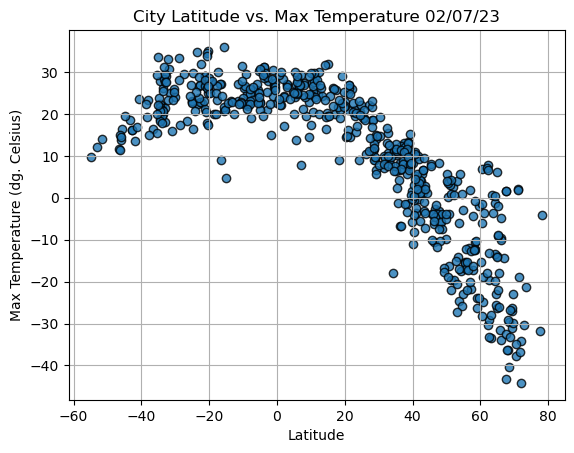

In [34]:

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max_Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind_Speed"]


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (dg. Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../output_data/weather.png")

# Show plot.
plt.show()   

#### Latitude Vs. Humidity

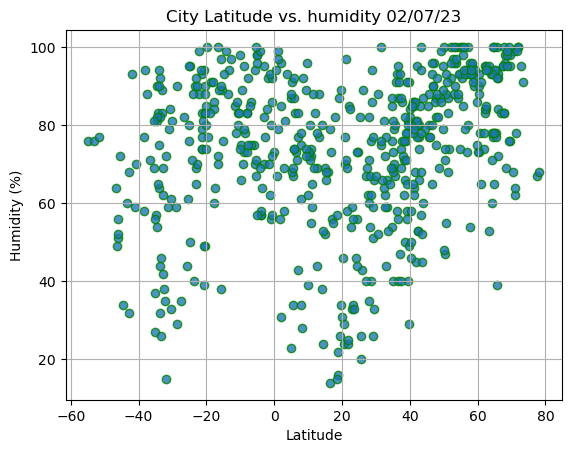

In [35]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(lats,humidity,edgecolor="g", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

 
# Save the figure
plt.savefig("../output_data/lat_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

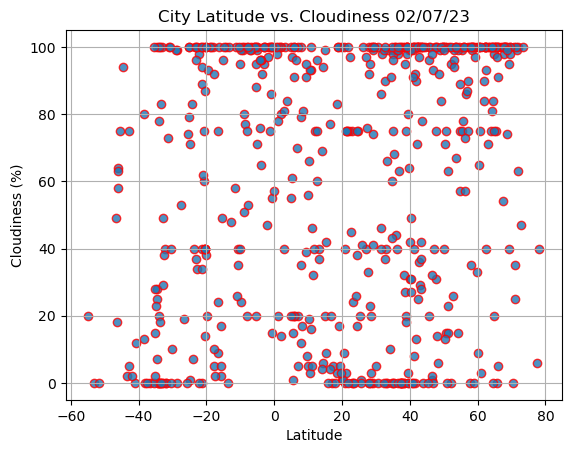

In [36]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.scatter(lats,cloudiness,edgecolor="r", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

 
# Save the figure
plt.savefig("../output_data/lat_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

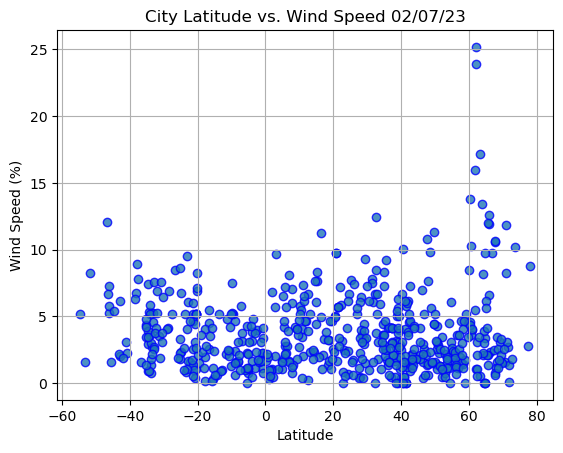

In [37]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.scatter(lats,wind_speed,edgecolor="b", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

 
# Save the figure
plt.savefig("../output_data/lat_Wind_speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,3.20,85,100,0.00,US,1675826537
3,taurianova,38.3563,16.0109,5.77,71,32,1.65,IT,1675826712
5,saskylakh,71.9167,114.0833,-34.18,100,100,0.05,RU,1675826713
9,palm city,27.1678,-80.2662,22.25,67,40,5.14,US,1675826418
10,avera,33.1940,-82.5271,9.10,59,66,1.81,US,1675826715


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,26.58,69,37,4.04,PF,1675826711
2,esperance,-33.8667,121.9000,22.01,64,78,5.21,AU,1675826711
4,port macquarie,-31.4333,152.9167,25.08,59,73,3.52,AU,1675826712
6,padang,-0.9492,100.3543,28.03,56,86,1.13,ID,1675826713
7,ushuaia,-54.8000,-68.3000,9.81,76,20,5.14,AR,1675826714


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.79x + 33.89
R squared: 0.7748489207340411


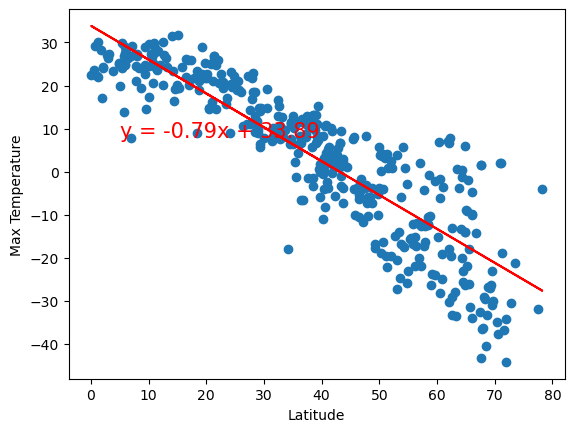

In [25]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
#northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0,:]

from scipy import stats
from scipy.stats import linregress

x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max_Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Northern_hemi_TEMP_LAT_reg_plot.png")
# Show plot
plt.show()
# Call the function.


Regression line equation is: y = 0.16x + 27.18
R squared: 0.15541005695773003


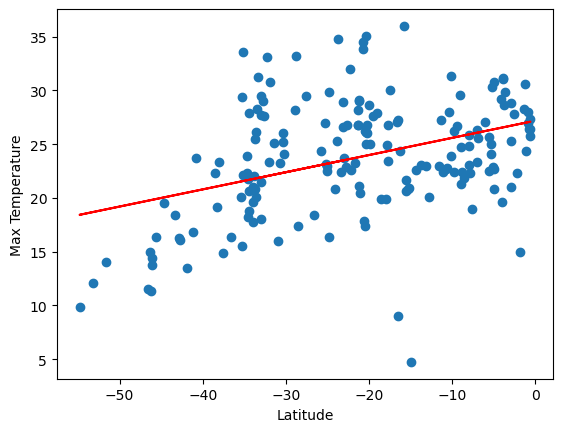

In [26]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max_Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,12),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("../output_data/Southern_hemi_TEMPLat_reg_plot.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Linear regression analysis between Maximum Temperature (Max Temp) and Latitude (Lat) showed two different relationship among northern hemisphere and southern hemisphere. For the Northern hemisphere, the correlation was high (r^2 = o.753) and the variables had negative linear relationshop with each other. That means the temperature has inverse relationship with latitude in Northern hemisphere. Lower the latitude, higher the temperature is. The correlation analysis in Southern hemisphere was very low (r^2 = 0.124) and the relation establish was positive. The low correlation shows that the temperature variation in Southern hemisphere is independant of latitude. 


### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.4x + 58.37
R squared: 0.1673405256646199


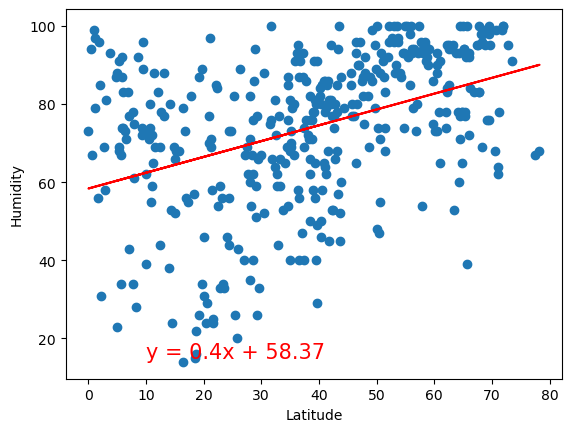

In [27]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Northern_hemi_Humidity_reg_plot.png")
# Show plot
plt.show()
# Call the function.


Regression line equation is: y = 0.47x + 83.67
R squared: 0.11263587190862637


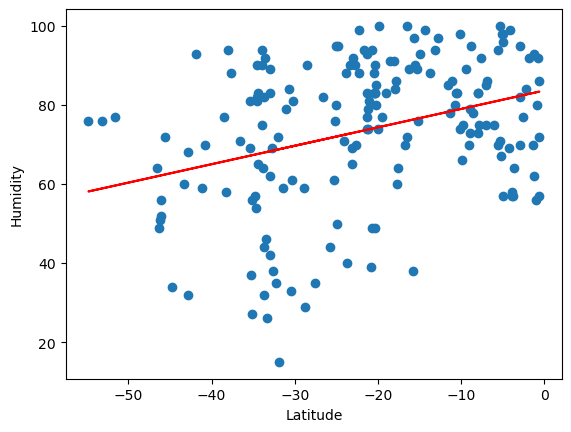

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/southern_hemi_Humidity_reg_plot.png")
# Show plot
plt.show()
# Call the function.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Humidity was positively related to latitude in both hemisphere but the correlation was low (r2 =  0.229 and 0.133, respectively for North and South hemisphere).

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.49x + 43.18
R squared: 0.06046946890415656


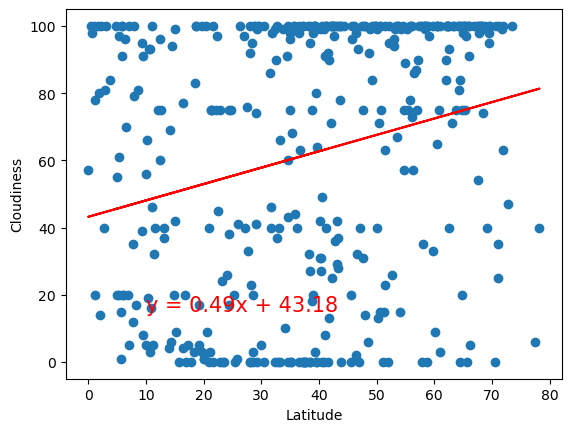

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Northern_hemi_Cloudiness_reg_plot.png")
# Show plot
plt.show()

Regression line equation is: y = 1.37x + 86.69
R squared: 0.21463187956152913


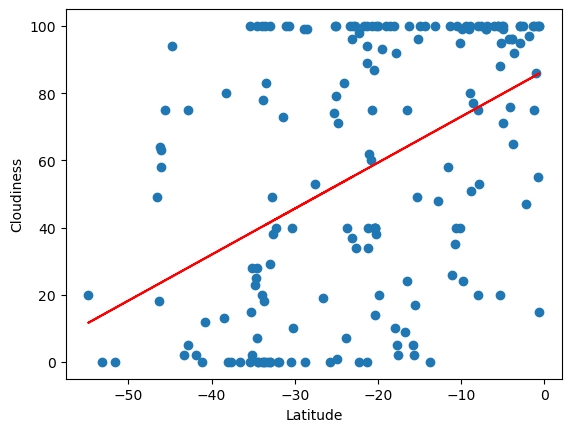

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Southern_hemi_Cloudiness_reg_plot.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Cloudiness showed a weak positive correlation with latitude in Northern hemisphere (r2 = 0.135) as well as in the Southern hemisphere(r2 = 0.136). 

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.01x + 3.28
R squared: 0.004433850457504637


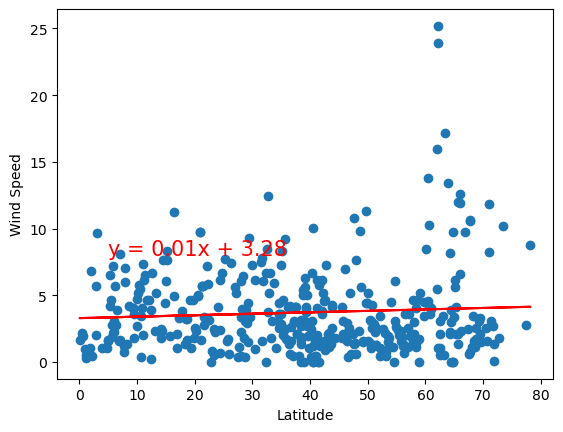

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind_Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Northern_hemi_windspeed_reg_plot.png")
# Show plot
plt.show()

Regression line equation is: y = -0.06x + 2.12
R squared: 0.13397130747429337


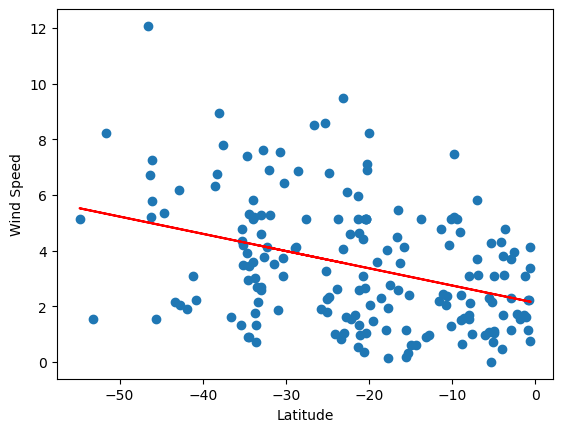

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind_Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Southern_hemi_windspeed_reg_plot.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Wind speed also showed very low correlation in both hemisphere. Northern hemisphere, wind speed is independent of latitude, however, Southern hemisphere, relation was negatively associated.

** Conclusion:** 
The lenear regression analysis doesn't able to establish strong relation between meteorological variables with latitude. There are chances of several confounding factors incorporating the weak or no relationship. 